In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

In [2]:
#connect with database
conn = sql.connect('database.sqlite')
conn

In [3]:
#reading sql query thourgh pandas
pd.read_sql_query('select * from sqlite_master',conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [4]:
#reading tables
pd.read_sql_query('select * from sqlite_master where type = "table"',conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...


In [5]:
#defining sql query in fuction to minimize repeating
def sql_query(q):
    return pd.read_sql_query(q,conn)

In [6]:
q = '''
    select * from salaries
    '''
sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


#### Question 1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [7]:
q = '''
select avg(TotalPayBenefits) 'Avg of Total Pay Benefits per Job Title', JobTitle from salaries 
where 
jobtitle != 'Not Provided' and jobtitle != 'Not provided'
group by 2
order by 1 desc
'''
sql_query(q)

,Avg of Total Pay Benefits per Job Title,JobTitle
0,436224.360000,Chief Investment Officer
1,411732.266667,Chief of Police
2,408865.326667,"Chief, Fire Department"
3,399211.275000,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
4,380696.440000,"Gen Mgr, Public Trnsp Dept"
...,...,...
2153,673.800000,SPECIAL ASSISTANT XIV
2154,638.787879,"BOARD/COMMISSION MEMBER, GROUP III"
2155,475.047742,"BdComm Mbr, Grp2,M=$25/Mtg"
2156,296.511628,"BOARD/COMMISSION MEMBER, GROUP II"


#### Question 2. Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [8]:
q = '''
Select count(JobTitle) as Jobs_Counts, JobTitle, Year
From salaries
Where jobtitle Not in ('Not provided','Not Provided')
Group by Year, JobTitle
Order by 1 desc
'''
sql_query(q)

,Jobs_Counts,JobTitle,Year
0,2479,Transit Operator,2014
1,2388,TRANSIT OPERATOR,2011
2,2295,Transit Operator,2013
3,2262,Transit Operator,2012
4,1478,Special Nurse,2014
...,...,...,...
4131,1,Water Meter Shop Supervisor 1,2014
4132,1,Wharfinger 1,2014
4133,1,Window Cleaner Supervisor,2014
4134,1,Wire Rope Cable Maint Sprv,2014


### Solution 2: 
- Job Title  'Transit Operator' has the most number of Employees each year

#### Question 3. What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [9]:
q = '''
Select count(Distinct(employeename)) as Total_Number_of_Unique_Employees from salaries
Where employeename Not In ('Not Provided', "Not provided")
'''
sql_query(q)

,Total_Number_of_Unique_Employees
0,110809


### Soultion 3:  
- Total number of unique employees are 110809

#### Question 4. Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [10]:
q = '''
Select employeename, TotalPayBenefits 
From salaries
Where Employeename Not In ('Not Provided', 'Not provided') 
Order by 2 desc
'''
sql_query(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,510732.68
3,Amy P Hart,479652.21
4,William J Coaker Jr.,436224.36
...,...,...
148643,Roy I Tillery,0.00
148644,Timothy E Gibson,-2.73
148645,Mark E Laherty,-8.20
148646,David P Kucia,-33.89


#### Question 5. Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [11]:
q = '''
Select Employeename, TotalPaybenefits, JobTitle 
From Salaries
Where TotalPaybenefits > 125000 and TotalPaybenefits <150000
And JobTitle = 'Firefighter'
And Employeename Not in ('Not Provided', 'Not provided')
'''
sql_query(q)

,EmployeeName,TotalPayBenefits,JobTitle
0,Randall Henderson,147912.75,Firefighter
1,Virginia Cheung,147862.14,Firefighter
2,Travis Hemenez,147664.12,Firefighter
3,Gail Readdie,147452.17,Firefighter
4,Gregory Ginotti,147216.47,Firefighter
...,...,...,...
110,Stephen J Kloster,126784.13,Firefighter
111,Jeffrey D Ryan,126687.13,Firefighter
112,Jovan R Blake,126169.62,Firefighter
113,Dino M Cafferata,125680.52,Firefighter


#### Question 6. How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')

In [12]:
q = '''
Select count(employeename) as 'No of Employees with No Overtimepay or Otherpay' 
From salaries
Where overtimepay = 0 
or Otherpay = 0
And Employeename Not in ('Not Provided', 'Not provided')
'''
sql_query(q)

,No of Employees with No Overtimepay or Otherpay
0,84266


In [13]:
q = '''
Select employeename
From salaries
Where overtimepay is 0 
or Otherpay is 0
and lower(jobtitle) NOT IN ('not provided', 'not provid')
'''
sql_query(q)

,EmployeeName
0,NATHANIEL FORD
1,DAVID KUSHNER
2,JOANNE HAYES-WHITE
3,EDWARD HARRINGTON
4,JOHN MARTIN
...,...
84261,Carolyn A Wilson
84262,Joann Anderson
84263,Leon Walker
84264,Roy I Tillery


#### Question 7. Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

In [14]:
q = '''
Select employeename, Overtimepay, otherpay 
From salaries
where overtimepay > 0 and Otherpay > 0
and lower(employeename) Not in ('not provided')
Order by 2 desc
limit 10
'''
sql_query(q)

,EmployeeName,OvertimePay,OtherPay
0,GARY JIMENEZ,245131.88,137811.38
1,Gary Altenberg,220909.48,13126.31
2,Whitney P Yee,196689.18,16622.66
3,Frederick Binkley,192424.49,17917.18
4,Antonio B Santiago,173547.73,19740.81
5,Barry J Bloom,173178.23,17960.11
6,Whitney P Yee,169659.92,16813.46
7,Gary L Altenberg,163477.81,20994.96
8,Scott Scholzen,160418.47,19873.80
9,Barry J Bloom,156077.49,17018.22


In [15]:
import seaborn as sns

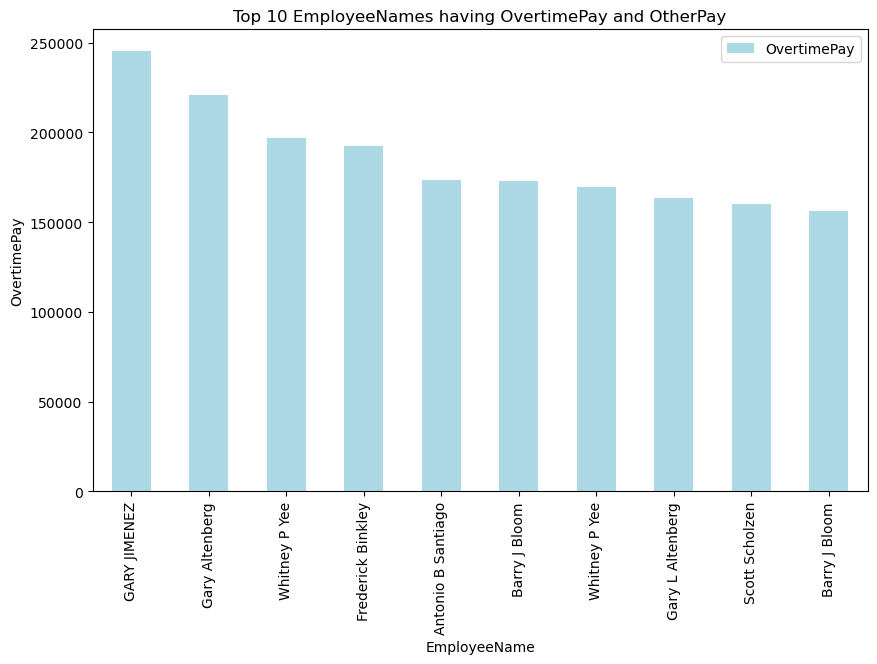

In [16]:
#Bar ploting using pandas and matplotlib
a = pd.read_sql_query(q,conn)
a.plot( kind = 'bar', x = 'EmployeeName', y = 'OvertimePay', color = 'lightblue', figsize= (10,6))
plt.xlabel('EmployeeName')
plt.ylabel('OvertimePay')
plt.title('Top 10 EmployeeNames having OvertimePay and OtherPay')
plt.show()

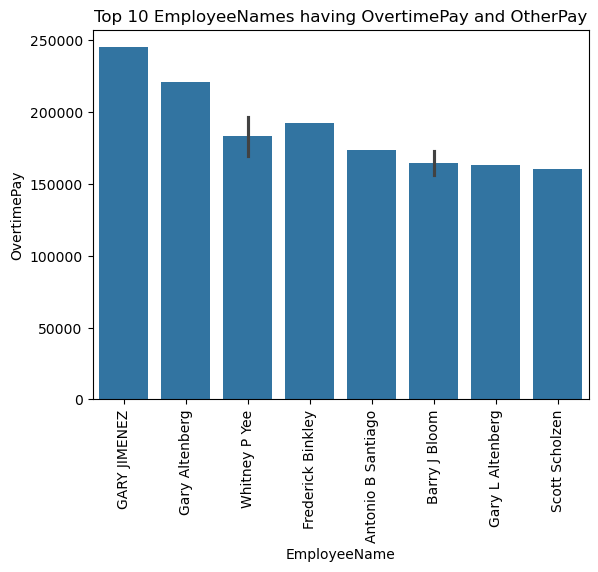

In [17]:
a = pd.read_sql_query(q,conn)

#bar plot using seaborn lib
sns.barplot( x = 'EmployeeName', y = 'OvertimePay', data = a)
plt.xlabel('EmployeeName')
plt.ylabel('OvertimePay')
plt.xticks(rotation = 90)
plt.title('Top 10 EmployeeNames having OvertimePay and OtherPay')
plt.show()

#### Question 8. Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')

In [18]:
q = '''
Select avg(BasePay) as Avg_of_BasePay, avg(OvertimePay) as Avg_of_OvertimePay, avg(OtherPay) as Avg_of_OtherPay
From Salaries
Where lower(Employeename) Not in ('not provided')
'''
sql_query(q)

,Avg_of_BasePay,Avg_of_OvertimePay,Avg_of_OtherPay
0,66055.45257,5065.821161,3648.761721


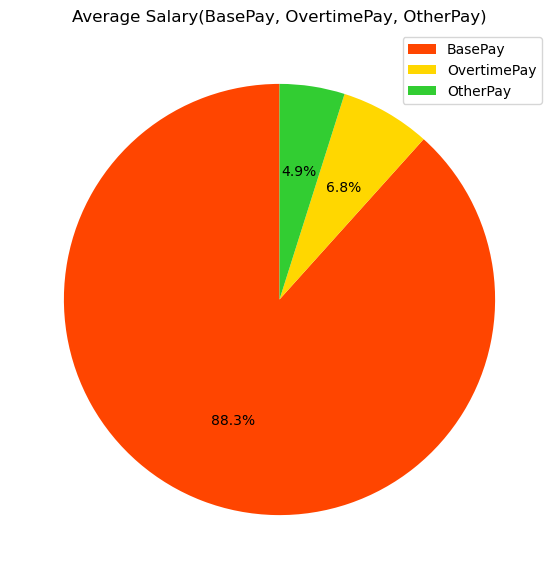

In [19]:
result = sql_query(q)

#to convert the result into a Series for plotting
avg_pay = result.iloc[0]  # Get the first and only row
avg_values = avg_pay.values  # Convert to a numpy array for plotting

# Plotting the pie chart
avg_value_labels = ['BasePay', 'OvertimePay', 'OtherPay']
plt.figure(figsize=(7, 7))
plt.pie(x = avg_values, labels=None, autopct='%1.1f%%', startangle=90, colors = ['#FF4500', '#FFD700', '#32CD32'])
plt.legend(labels = avg_value_labels , loc= 'upper right')
plt.title("Average Salary(BasePay, OvertimePay, OtherPay)")
plt.show()

#### Question 9. Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')


In [20]:
q = '''
Select avg(TotalPayBenefits) 'Average_TotalPayBenefits', JobTitle
From salaries
where lower(JobTitle) Not in ('not provided')
Group by 2
Having avg(TotalPayBenefits) > 75000
Order by 1 desc
'''
sql_query(q)

,Average_TotalPayBenefits,JobTitle
0,436224.360000,Chief Investment Officer
1,411732.266667,Chief of Police
2,408865.326667,"Chief, Fire Department"
3,399211.275000,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
4,380696.440000,"Gen Mgr, Public Trnsp Dept"
...,...,...
1432,75273.754200,"OPERATING ENGINEER, UNIVERSAL"
1433,75255.005833,CABLE SPLICER
1434,75246.657391,Community Development Asst
1435,75108.724532,Senior Legal Process Clerk


#### Question 10. Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')

In [27]:
q = '''
Select count(EmployeeName) as "Number of Employees" , JobTitle
From salaries
Where lower(Jobtitle) Not in ('not provided')
Group by Jobtitle 
Having count(EmployeeName) > 10
Order by 1 desc
'''
sql_query(q)

,Number of Employees,JobTitle
0,7036,Transit Operator
1,4389,Special Nurse
2,3736,Registered Nurse
3,2518,Public Svc Aide-Public Works
4,2421,Police Officer 3
...,...,...
1151,11,AUTOMOTIVE MECHANIC ASSISTANT SUPERVISOR
1152,11,ASSOCIATE PERFORMANCE AUDITOR
1153,11,ASSISTANT ELECTRONIC MAINTENANCE TECHNICIAN
1154,11,ARTS PROGRAM ASSISTANT
